In [8]:
import pandas as pd
import octopus.core.predict as pred
import octopus.visualization.plotting as vis
from octopus.preprocessing import compute_grad_image
import octopus.dataset as ds

In [14]:
m = pd.read_csv('all_metrics.csv')
m


,Dice,IoU,Sensitivity,FPR,RMSE,Hausdorff Distance,Method,Scan_ID
0,0.718478,0.560645,0.672774,0.001277,0.057839,12.247449,SegNet,841-11
1,0.749928,0.599908,0.664631,0.000689,0.053034,11.224972,Rational Quadratic,841-11
2,0.739842,0.587103,0.667176,0.000871,0.054564,10.148892,Exponential Sine Sq,841-11
3,0.740006,0.587309,0.664122,0.000835,0.054416,10.488088,Matèrn,841-11
4,0.779896,0.639205,0.771539,0.001485,0.055699,9.000000,SegNet,673-35
5,0.775951,0.633922,0.738534,0.001184,0.055120,11.575837,Rational Quadratic,673-35
6,0.750111,0.600142,0.724389,0.001485,0.058636,9.327379,Exponential Sine Sq,673-35
7,0.769768,0.625710,0.755251,0.001485,0.056731,10.488088,Matèrn,673-35
8,0.723270,0.566502,0.735832,0.002734,0.071440,7.211103,SegNet,163-19
9,0.693750,0.531100,0.710238,0.003085,0.075390,6.324555,Rational Quadratic,163-19


In [15]:
scans, inits, gts = ds.load_dataset()

In [16]:
scan0 = scans['841-11']
scan1 = scans['673-35']
init0 = inits['841-11']
init1 = inits['673-35']
gt0 = gts['841-11']
gt1 = gts['673-35']

grad0 = compute_grad_image(scan0)
grad1 = compute_grad_image(scan1)

In [18]:
# Define kernel options
rational_quad = {
    'kernel': 'RationalQuadratic',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'alpha': 2.0
}

exp_sine_sq = {
    'kernel': 'ExpSineSquared',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'period': 50.0
}

matern = {
    'kernel': 'Matern',
    'sigma_f': 1.0,
    'length_scale': 2.5,
    'nu': 2.5
}

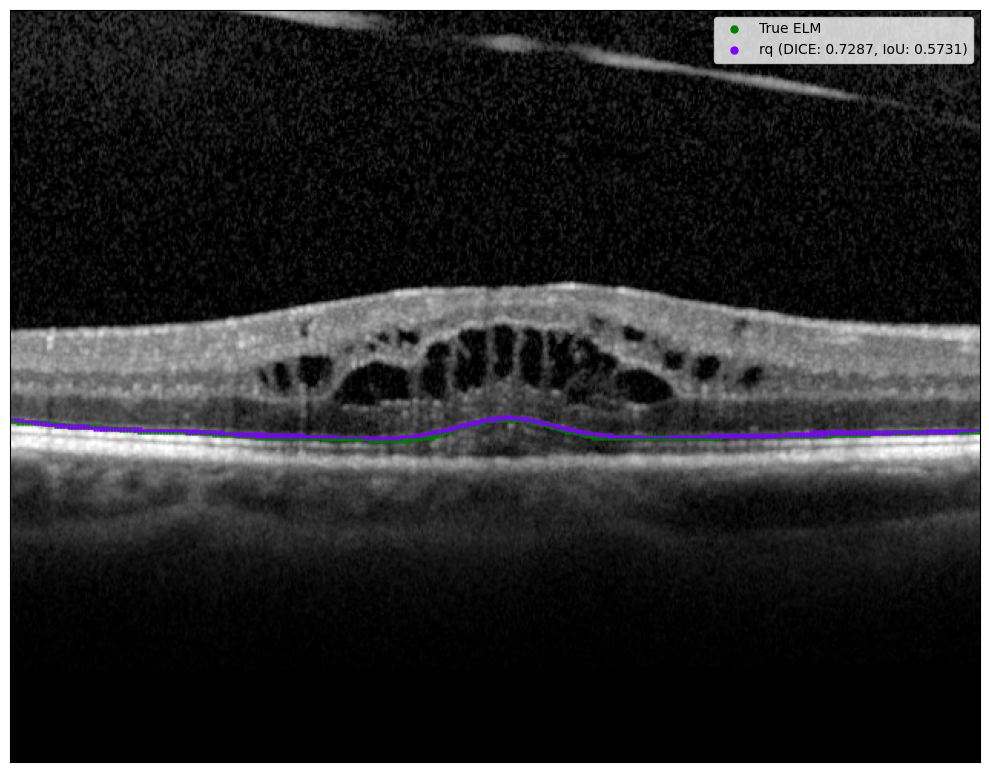

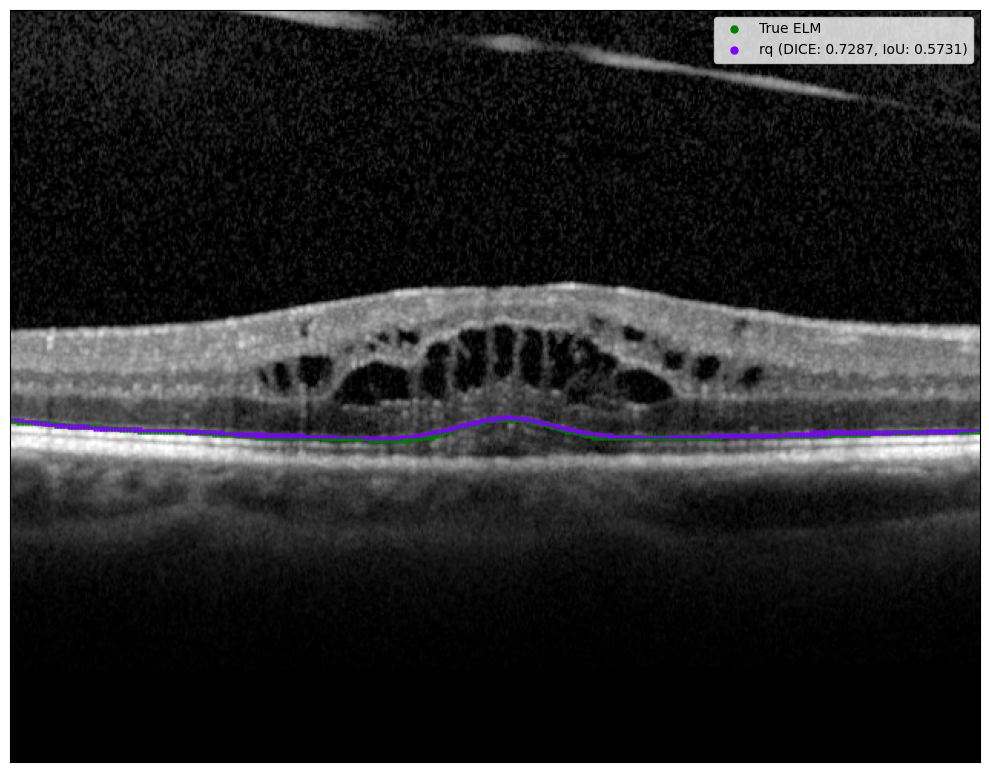

In [20]:

# Trace ELM using different kernels
rq_pred = pred.trace_elm(grad0, init0, kernel_options=rational_quad, num_runs=70)

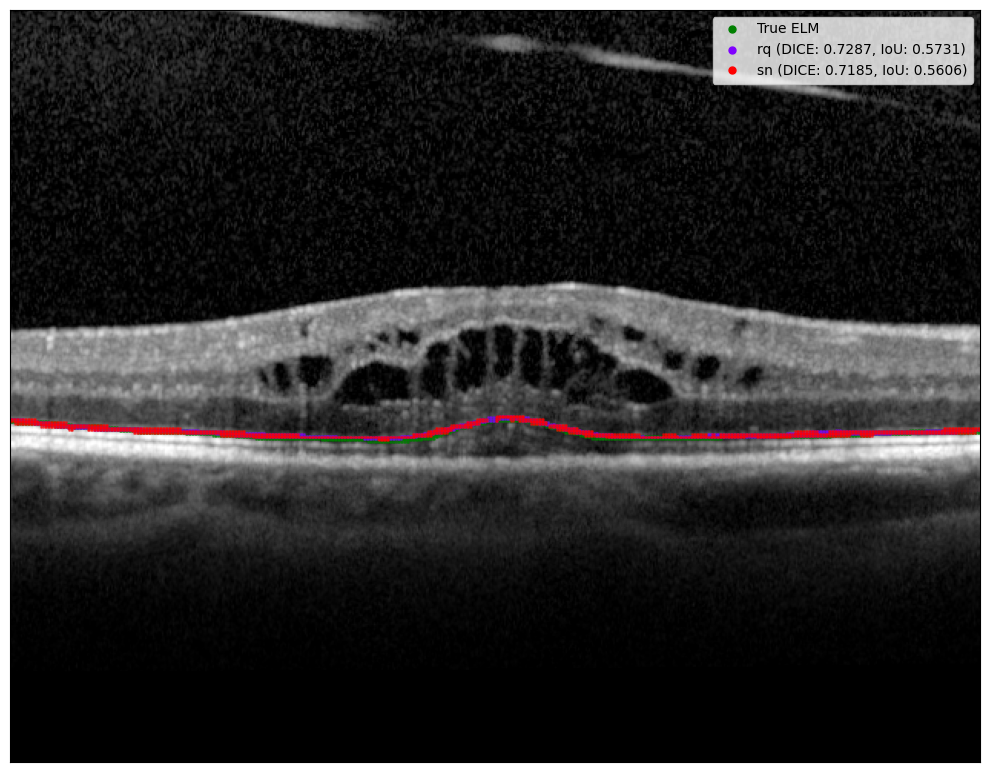

In [21]:
f = vis.display_scan(scan0, {'rq': rq_pred, 'sn': init0}, gt_elm=gt0)

In [22]:
ess_pred = pred.trace_elm(grad0, init0, kernel_options=exp_sine_sq, num_runs=70)
m_pred = pred.trace_elm(grad0, init0, kernel_options=matern, num_runs=70)

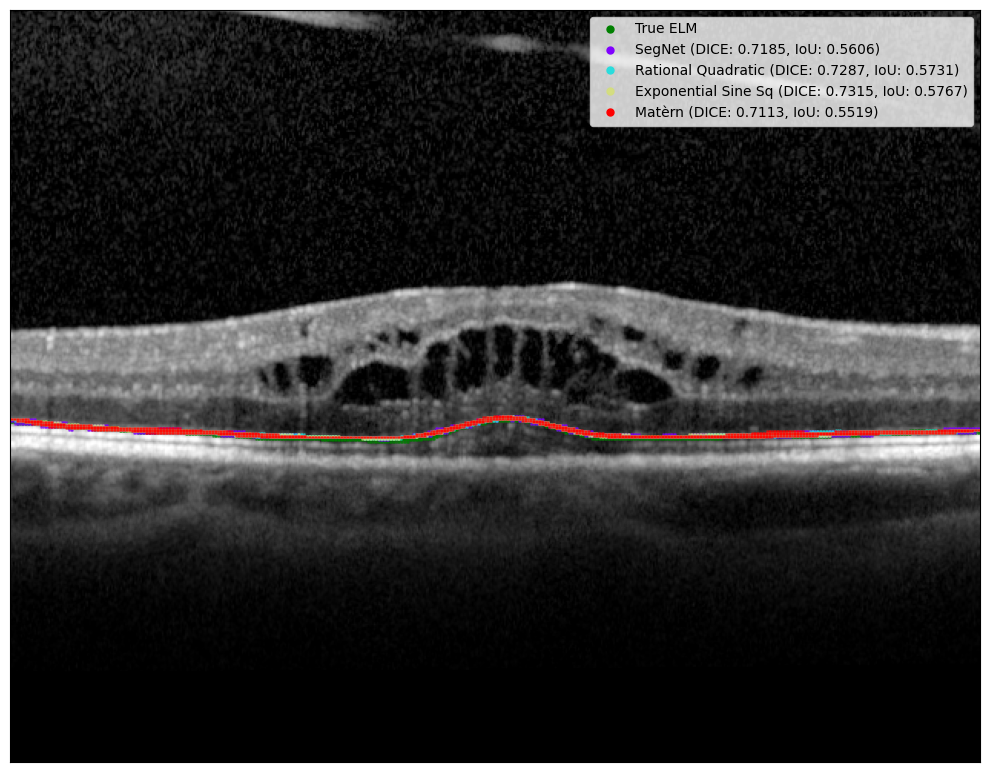

In [23]:
# Create predictions dictionary
predictions = {
    'SegNet': init0,
    'Rational Quadratic': rq_pred,
    'Exponential Sine Sq': ess_pred,
    'Matèrn': m_pred
}

# Generate and save figure
fig = vis.display_scan(scan0, predictions, gt_elm=gt0)


In [27]:
from octopus.core import metrics as m
metrics0 = {}
for model, p in predictions.items():
    metrics0[model] = m.calculate_all_metrics(p, gt0, scan0.shape)

In [29]:
metrics0

{'SegNet': {'Dice': 0.7184782608695652,
  'IoU': 0.5606446140797285,
  'Sensitivity': 0.6727735368956743,
  'FPR': 0.0012771558097590303,
  'RMSE': 0.0578393359957284,
  'Hausdorff Distance': 12.24744871391589},
 'Rational Quadratic': {'Dice': 0.7286602600339175,
  'IoU': 0.5731436193863939,
  'Sensitivity': 0.6559796437659033,
  'FPR': 0.0009229319337698844,
  'RMSE': 0.05567741163956837,
  'Hausdorff Distance': 10.04987562112089},
 'Exponential Sine Sq': {'Dice': 0.7315417256011315,
  'IoU': 0.5767172167707404,
  'Sensitivity': 0.6580152671755726,
  'FPR': 0.0009001836114586549,
  'RMSE': 0.05535750743623747,
  'Hausdorff Distance': 9.539392014169456},
 'Matèrn': {'Dice': 0.711285354242509,
  'IoU': 0.5519339417644502,
  'Sensitivity': 0.6463104325699746,
  'FPR': 0.0010919194709390183,
  'RMSE': 0.057699593496323004,
  'Hausdorff Distance': 10.0}}

In [31]:
# Trace ELM using different kernels
rq_pred1 = pred.trace_elm(grad1, init1, kernel_options=rational_quad, num_runs=70)
ess_pred1 = pred.trace_elm(grad1, init1, kernel_options=exp_sine_sq, num_runs=70)
m_pred1 = pred.trace_elm(grad1, init1, kernel_options=matern, num_runs=70)

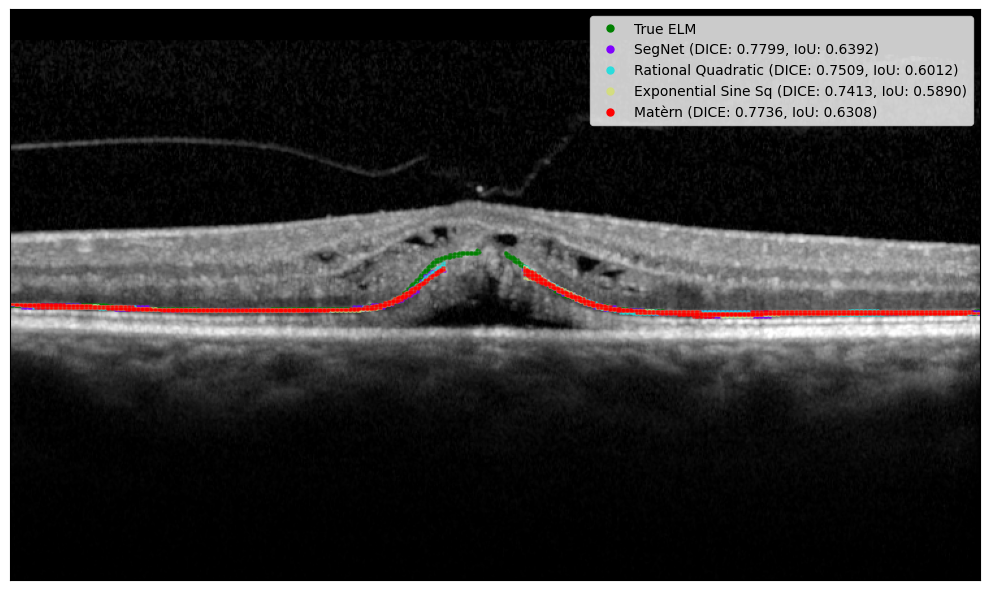

In [32]:
# Create predictions dictionary
predictions1 = {
    'SegNet': init1,
    'Rational Quadratic': rq_pred1,
    'Exponential Sine Sq': ess_pred1,
    'Matèrn': m_pred1
}

# Generate and save figure
fig1 = vis.display_scan(scan1, predictions1, gt_elm=gt1)

In [33]:
metrics1 = {}
for model, p in predictions1.items():
    metrics1[model] = m.calculate_all_metrics(p, gt1, scan1.shape)

In [34]:
metrics1

{'SegNet': {'Dice': 0.779896013864818,
  'IoU': 0.6392045454545454,
  'Sensitivity': 0.7715387912558938,
  'FPR': 0.0014854179929327319,
  'RMSE': 0.05569871554377077,
  'Hausdorff Distance': 9.0},
 'Rational Quadratic': {'Dice': 0.7509118214975328,
  'IoU': 0.601167983510821,
  'Sensitivity': 0.7501071581654523,
  'FPR': 0.0017775809522052152,
  'RMSE': 0.059540768523701236,
  'Hausdorff Distance': 9.9498743710662},
 'Exponential Sine Sq': {'Dice': 0.7413394919168591,
  'IoU': 0.5889908256880734,
  'Sensitivity': 0.6879554222031719,
  'FPR': 0.0012055566319454055,
  'RMSE': 0.0584799964353937,
  'Hausdorff Distance': 11.489125293076057},
 'Matèrn': {'Dice': 0.7735807377954496,
  'IoU': 0.6307636887608069,
  'Sensitivity': 0.7505357908272611,
  'FPR': 0.0013624020100811598,
  'RMSE': 0.05594486868992377,
  'Hausdorff Distance': 11.090536506409418}}

In [35]:
fig.savefig('figures/kernel_comp_no_mh.pdf')

In [36]:
fig1.savefig('figures/kernel_comp_mh.pdf')